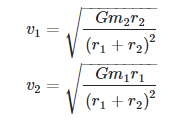

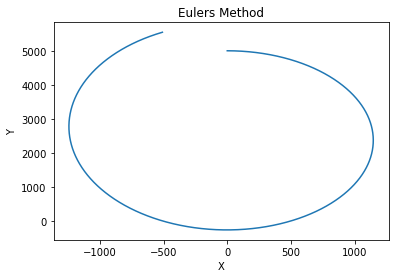

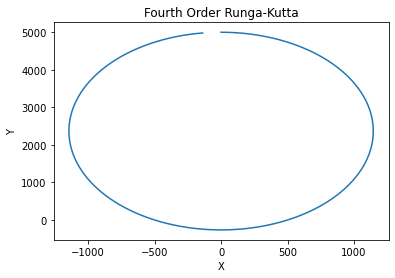

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#F_x = G*m2*(x2-x1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.)
G = 6.67430e-11 # m**3/(kg*s**2)
m2 = 1e10 #kg

r2 = np.array([0,0])
x2 = r2[0]
y2 = r2[1]

def obj1(r, t):
    vx = r[2]
    vy = r[3]
    x1 = r[0]
    y1 = r[1]
    
    yprime = vy
    vyprime = G*m2*(y2-y1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.)
    xprime = vx
    vxprime = G*m2*(x2-x1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.)
    
    return np.array([vx, vy, vxprime , vyprime])

a = 1.0
b = 1000000
N = 50000
h = (b-a)/N

t = np.linspace(a, b, N+1)
#Setting Constants
r_sol = np.zeros([4, len(t)])
r_sol[0,0] = 0 #x m
r_sol[1,0] = 5000 #y m
r_sol[2,0] = 0.00365 #vx m/s
r_sol[3,0] = 0 #vy m/s

#Solve with Eulers Method 
for i in range(1, len(t)):
    r_sol[:, i] = r_sol[:, i-1] + h*obj1( r_sol[:, i-1], t[i-1])

#Fourth order Runga-Kutta
r_rk4 = np.zeros([4,len(t)])
r_rk4[0,0] = 0 #x m
r_rk4[1,0] = 5000 #y m
r_rk4[2,0] = 0.00365 #vx m/x
r_rk4[3,0] = 0 #vy m/s

for i in range(1, len(t)):
    k1 = h*obj1(r_rk4[:, i-1], t[i-1])
    k2 = h*obj1(r_rk4[:, i-1] + k1/2.0, t[i-1] + h/2.0)
    k3 = h*obj1(r_rk4[:, i-1] + k2/2.0, t[i-1] + h/2.0)
    k4 = h*obj1(r_rk4[:, i-1] + k3, t[i-1] + h)
    r_rk4[:, i] = r_rk4[:, i-1] + 1.0/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4)

plt.plot(r_sol[0,:],r_sol[1,:])
plt.title('Eulers Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("figure1.png")
plt.show()
plt.plot(r_rk4[0,:],r_rk4[1,:])
plt.title('Fourth Order Runga-Kutta')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("figure1.png")
plt.show()

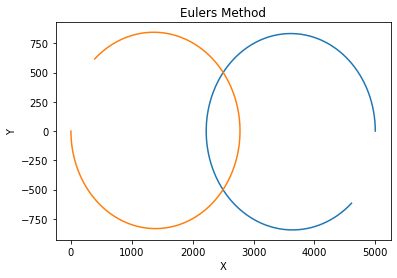

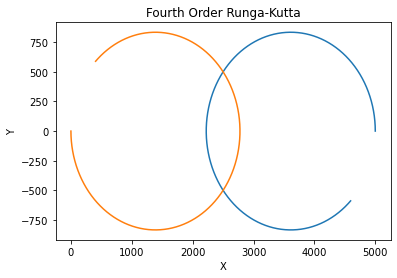

In [39]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11 #m**3/(kg*s**2)
m2 = 1e10 #kg
m1 = 1e10 #kg

def twobody(r, t):
    vx1 = r[2] #m/s
    vy1 = r[3] #m/s
    x1 = r[0] #m
    y1 = r[1] #m
    
    vx2 = r[6] #m/s
    vy2 = r[7] #m/s
    x2 = r[4] #m
    y2 = r[5] #m
    
    yprime1 = vy1
    vyprime1 = G*m2*(y2-y1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.)
    xprime1 = vx1
    vxprime1 = G*m2*(x2-x1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.)
    
    yprime2 = vy2
    vyprime2 = G*m1*(y1-y2)/( (x1-x2)**2.0 + (y1-y2)**2.0 )**(3./2.)
    xprime2 = vx2
    vxprime2 = G*m1*(x1-x2)/( (x1-x2)**2.0 + (y1-y2)**2.0 )**(3./2.)
    
    return np.array([vx1, vy1, vxprime1, vyprime1, vx2, vy2, vxprime2, vyprime2])

a = 1.0
b = 625000
N = 50000
h = (b-a)/N

t = np.linspace(a, b, N+1)
#solving with Euler's method
r_sol = np.zeros([8, len(t)])
r_sol[0,0] = 5000 #x1 m
r_sol[1,0] = 0 #y1 m
r_sol[2,0] = 0 #vx1 m/s
r_sol[3,0] = 0.00365 #vy1 m/s
r_sol[4,0] = 0 #x2 m
r_sol[5,0] = 0 #y2 m
r_sol[6,0] = 0 #vx2 m/s
r_sol[7,0] = -0.00365 #vy2 m/s

#Eulers 
for i in range(1, len(t)):
    r_sol[:, i] = r_sol[:, i-1] + h*twobody( r_sol[:, i-1], t[i-1])

#Fourth order Runga-Kutta
r_rk4 = np.zeros([8,len(t)])
r_rk4[0,0] = 5000 #x1 m
r_rk4[1,0] = 0 #y1 m
r_rk4[2,0] = 0 #vx1 m/s
r_rk4[3,0] = 0.00365 #vy1 m/s
r_rk4[4,0] = 0 #x2 m
r_rk4[5,0] = 0 #y2 m
r_rk4[6,0] = 0 #vx2 m/s
r_rk4[7,0] = -0.00365 #vy2 m/s

for i in range(1, len(t)):
    k1 = h*twobody(r_rk4[:, i-1], t[i-1])
    k2 = h*twobody(r_rk4[:, i-1] + k1/2.0, t[i-1] + h/2.0)
    k3 = h*twobody(r_rk4[:, i-1] + k2/2.0, t[i-1] + h/2.0)
    k4 = h*twobody(r_rk4[:, i-1] + k3, t[i-1] + h)
    r_rk4[:, i] = r_rk4[:, i-1] + 1.0/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4)

plt.plot(r_sol[0,:],r_sol[1,:],r_sol[4,:],r_sol[5,:])
plt.title('Eulers Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(r_rk4[0,:],r_rk4[1,:],r_rk4[4,:],r_rk4[5,:])
plt.title('Fourth Order Runga-Kutta')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

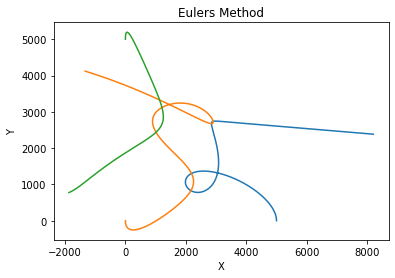

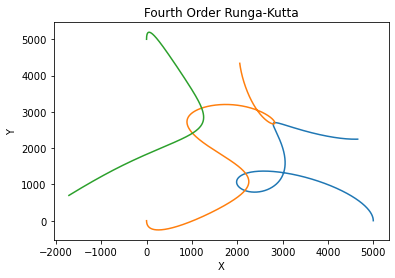

In [64]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11
m2 = 1e10
m1 = 1e10
m3 = 1e10

def threebody(r, t):
    
    vx1 = r[2]
    vy1 = r[3]
    x1 = r[0]
    y1 = r[1]
    
    x2 = r[4]
    y2 = r[5]
    vx2 = r[6]
    vy2 = r[7]
    
    x3 = r[8]
    y3 = r[9]
    vx3 = r[10]
    vy3 = r[11]
    
    yprime1 = vy1
    vyprime1 = G*m2*(y2-y1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.) + G*m3*(y3-y1)/( (x3-x1)**2.0 + (y3-y1)**2.0 )**(3./2.)
    xprime1 = vx1
    vxprime1 = G*m2*(x2-x1)/( (x2-x1)**2.0 + (y2-y1)**2.0 )**(3./2.) + G*m3*(x3-x1)/( (x3-x1)**2.0 + (y3-y1)**2.0 )**(3./2.)
    
    yprime2 = vy2
    vyprime2 = G*m1*(y1-y2)/( (x1-x2)**2.0 + (y1-y2)**2.0 )**(3./2.) + G*m1*(y3-y2)/((x3-x2)**2.0 + (y3-y2)**2.0 )**(3./2.)
    xprime2 = vx2
    vxprime2 = G*m1*(x1-x2)/( (x1-x2)**2.0 + (y1-y2)**2.0 )**(3./2.) + G*m1*(x3-x2)/( (x3-x2)**2.0 + (y3-y2)**2.0 )**(3./2.)
    
    yprime3 = vy3
    vyprime3 = G*m1*(y1-y3)/( (x1-x3)**2.0 + (y1-y3)**2.0 )**(3./2.) + G*m1*(y2-y3)/( (x2-x3)**2.0 + (y2-y3)**2.0 )**(3./2.)
    xprime3 = vx3
    vxprime3 = G*m1*(x1-x3)/( (x1-x3)**2.0 + (y1-y3)**2.0 )**(3./2.) + G*m1*(x2-x3)/( (x2-x3)**2.0 + (y2-y3)**2.0 )**(3./2.)
    
    return np.array([vx1, vy1, vxprime1, vyprime1, vx2, vy2, vxprime2, vyprime2, vx3, vy3, vxprime3, vyprime3])

a = 1.0
b = 625000
N = 50000
h = (b-a)/N

t = np.linspace(a, b, N+1)
#solving with Euler's method
r_sol = np.zeros([12, len(t)])
r_sol[0,0] = 5000 #x1 m
r_sol[1,0] = 0 #y1 m
r_sol[2,0] = 0 #vx1 m/s
r_sol[3,0] = 0.00365 #vy1 m/s
r_sol[4,0] = 0 #x2 m
r_sol[5,0] = 0 #y2 m
r_sol[6,0] = 0 #vx2 m/s
r_sol[7,0] = -0.00365 #vy2 m/s
r_sol[8,0] = 0 #x3 m
r_sol[9,0] = 5000 #y3 m
r_sol[10,0] = 0 #vx3 m/s
r_sol[11,0] = 0.00365 #vy3 m/s

#Eulers 
for i in range(1, len(t)):
    r_sol[:, i] = r_sol[:, i-1] + h*threebody( r_sol[:, i-1], t[i-1])

#Fourth order Runga-Kutta
r_rk4 = np.zeros([12,len(t)])
r_rk4[0,0] = 5000 #x1 m
r_rk4[1,0] = 0 #y1 m
r_rk4[2,0] = 0 #vx1 m/s
r_rk4[3,0] = 0.00365 #vy1 m/s
r_rk4[4,0] = 0 #x2 m
r_rk4[5,0] = 0 #y2 m
r_rk4[6,0] = 0 #vx2 m/s
r_rk4[7,0] = -0.00365 #vy2 m/s
r_rk4[8,0] = 0 #x3 m
r_rk4[9,0] = 5000 #y3 m
r_rk4[10,0] = 0 #vx3 m/s
r_rk4[11,0] = 0.00365 #vy3 m/s

for i in range(1, len(t)):
    k1 = h*threebody(r_rk4[:, i-1], t[i-1])
    k2 = h*threebody(r_rk4[:, i-1] + k1/2.0, t[i-1] + h/2.0)
    k3 = h*threebody(r_rk4[:, i-1] + k2/2.0, t[i-1] + h/2.0)
    k4 = h*threebody(r_rk4[:, i-1] + k3, t[i-1] + h)
    r_rk4[:, i] = r_rk4[:, i-1] + 1.0/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
plt.plot(r_sol[0,:],r_sol[1,:],r_sol[4,:],r_sol[5,:],r_sol[8,:],r_sol[9,:])
plt.title('Eulers Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(r_rk4[0,:],r_rk4[1,:],r_rk4[4,:],r_rk4[5,:],r_rk4[8,:],r_rk4[9,:])
plt.title('Fourth Order Runga-Kutta')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()